C:\Users\zyliu\AppData\Local\Temp\ipykernel_22572\245350005.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MASPpepK VS MASPpepK + NGP24h vs. NGP24h VS MASPpepK + NGP24h: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.270e-06 U_stat=1.280e+05


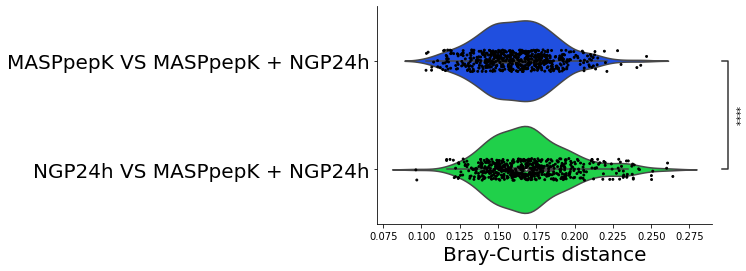

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

# read data and subset data.
dunn_data = pandas.read_csv('pos-distance-data.csv')
solo_to_combo = dunn_data[dunn_data["group_name"].isin(['MASPpepK VS MASPpepK + NGP24h', 'NGP24h VS MASPpepK + NGP24h'])]
plt.rc('ytick',labelsize=20)

order = ['MASPpepK VS MASPpepK + NGP24h',
         'NGP24h VS MASPpepK + NGP24h']

plt.style.use('seaborn-bright')

#palette_color = {'MASPpepK VS adjuvant': '#339999','NGP24h VS adjuvant': '#AA66FF','MASPpepK + NGP24h VS adjuvant': '#330066'}

plot_1 = sns.violinplot(y=solo_to_combo['group_name'] , x=solo_to_combo['Distance'], showfliers = False, order = order)
plot_1 = sns.stripplot(y=solo_to_combo['group_name'] , x=solo_to_combo['Distance'], order = order, color = "black", size=2, edgecolor="black", linewidth=.9)

annot_1 = Annotator(plot_1,[('MASPpepK VS MASPpepK + NGP24h','NGP24h VS MASPpepK + NGP24h')], y=solo_to_combo['group_name'] , x=solo_to_combo['Distance'], order=order, orient='h')
annot_1.configure(test='Mann-Whitney', comparisons_correction="BH", correction_format="replace", text_format='star', loc='outside', verbose=2)
annot_1.apply_test()
plot_1, test_results = annot_1.annotate()
plot_1.spines['top'].set_visible(False)
plot_1.spines['right'].set_visible(False)
plot_1.set_title("")
plot_1.set_xlabel('Bray-Curtis distance', fontsize = 20)
plot_1.set_ylabel('')
#plot_1.set_xlim([0, 0.4])
plt.savefig("pos_dunn_test_solo_to_combo.png", dpi=300, bbox_inches='tight')